# 初学者的TensorFlow教程

In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals

#载入Tensorflow
import tensorflow as tf
import matplotlib.pyplot as plt

载入准备好的MNIST数据集。将样本从整数转换为浮点数:

1
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 145 255 211  31   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  32 237 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  11 175 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 144 253 252  71   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  16 191 253 252 

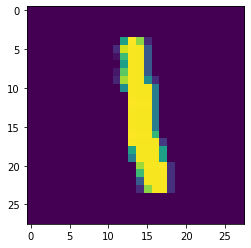

In [38]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[6])
print(y_train[6])
print(x_train[6])

In [39]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # map each number between 0 and 1

将模型的各层堆叠起来，以搭建tf.keras.Sequential模型。为训练选择优化器和损失函数：

In [42]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)), # The image is 28x28 输入层
    tf.keras.layers.Dense(128, activation = 'relu'), # 128 neurons 隐藏层
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax') # Last layers have ten neurons, because there are ten kinds of clothes. 输出层
])

model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

训练并验证模型：

In [44]:
model.fit(x_train, y_train, epochs = 10)
model.evaluate(x_test, y_test, verbose = 2)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0646 - accuracy: 0.9792
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0602 - accuracy: 0.9804
Epoch 3/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0531 - accuracy: 0.9822
Epoch 4/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0503 - accuracy: 0.9841
Epoch 5/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0440 - accuracy: 0.9859
Epoch 6/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0422 - accuracy: 0.9862s - l
Epoch 7/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.0396 - accuracy: 0.9866
Epoch 8/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0366 - accuracy: 0.9880
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0341 - accuracy: 0.9886
Epoch 10/

[0.06957913205295918, 0.9823]

现在这个照片分类器的准确度已经达到98%。

In [52]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.02):
            print("\nLoss is low so cancelling training!")
            self.model.stop_training = True

In [53]:
callbacks = myCallback()
model.fit(x_train, y_train, epochs=5, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0269 - accuracy: 0.9905
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0255 - accuracy: 0.9913s
Epoch 3/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0258 - accuracy: 0.9910
Epoch 4/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0241 - accuracy: 0.9917
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0240 - accuracy: 0.9920


-------
# 网络层

### 关于Keras层
- 所有层对象都有
   - layer.get_weights(): 返回层的权重
   - layer.set_weights(weights): 从numpy array中将权重加载到该层中
   - layer.get_config(): 返回当前层配置信息的字典，层也可以借由配置信息重构
- layer = Dense(32)



后面待补充

---------
# TensorFlow 2.0实践系列课程

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

#载入Tensorflow
import tensorflow as tf
import numpy as np

### A primer in machine learning
- 深度学习是机器学习的进一步发展
- 深度学习主要是依靠神经网络
- TensorFlow中的一个API是Keras
- keras使得定义神经网络变得容易
- a neural network is basically a set of function which can learn patterns

In [3]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])]) 
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

- the simplest neural network with only one neural
- use **Dense** to define a layer of connected neurons
- **a single neuron**: only one dense here, so there's only one layer, one unit in it
- **sequence**: Successive layers are defined in sequence, hence the word Sequential

In [4]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype = float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype = float)

In [6]:
model.fit(xs, ys, epochs = 20)

Train on 6 samples
Epoch 1/20
6/6 [==============================] - 0s 602us/sample - loss: 0.7043
Epoch 2/20
6/6 [==============================] - 0s 237us/sample - loss: 0.6897
Epoch 3/20
6/6 [==============================] - 0s 244us/sample - loss: 0.6755
Epoch 4/20
6/6 [==============================] - 0s 321us/sample - loss: 0.6616
Epoch 5/20
6/6 [==============================] - 0s 265us/sample - loss: 0.6480
Epoch 6/20
6/6 [==============================] - 0s 421us/sample - loss: 0.6347
Epoch 7/20
6/6 [==============================] - 0s 443us/sample - loss: 0.6216
Epoch 8/20
6/6 [==============================] - 0s 492us/sample - loss: 0.6088
Epoch 9/20
6/6 [==============================] - 0s 280us/sample - loss: 0.5963
Epoch 10/20
6/6 [==============================] - 0s 286us/sample - loss: 0.5841
Epoch 11/20
6/6 [==============================] - 0s 411us/sample - loss: 0.5721
Epoch 12/20
6/6 [==============================] - 0s 352us/sample - loss: 0.5603
Epoch 

In [7]:
print(model.predict([10.0]))

[[16.983816]]


**two main reasons:**
- very little data. There is very high probability that Y=19
- neural network try to figure out the answers for everything, they deal in probability

**Fashion MNIST dataset**
- 70k Images
- 10 Categories
- Images are 28x28
- Can train a neural net!